<a href="https://colab.research.google.com/github/baharababah/LogisticRegression/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
# ------------------------------------------------------------------
# Build the Logistic Regression Model
# Predict heart disease  based on 
# age 	sex 	cp 	trestbps 	chol 	fbs 	restecg 	thalach 	exang 	oldpeak 	slope 	ca 	thal
# ------------------------------------------------------------------
#https://www.kaggle.com/ronitf/heart-disease-uci
#
# Import Libraries
from google.colab import drive 
drive.mount('/content/drive/')
import pandas as pd
# Read the data and Create a copy
HearData = pd.read_csv("/content/drive/My Drive/Heart.csv")
HeartPrep = HeartData.copy()
HeartPrep.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
# Find out columns with missing values
HeartPrep.isnull().sum(axis=0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [63]:
# Show data types
HeartPrep.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7abd7a9c50>]],
      dtype=object)

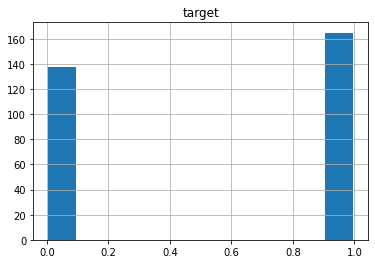

In [64]:
# Create pandas histogram to check the numbers of patients with heart disease vs no heart disease
HeartPrep.hist(column= 'target', rwidth = 0.9)

In [65]:
# ------------------------------------------------------
# Step 4 - Check Multiple Linear Regression Assumptions
# ------------------------------------------------------
# Linearity using correlation coefficient matrix using corr
# age 	sex 	cp 	trestbps 	chol 	fbs 	restecg 	thalach 	exang 	oldpeak 	slope 	ca 	thal 	target
pd.options.display.max_columns = None
correlation = HeartPrep[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'oldpeak','slope', 'ca', 'thal', 'target']].corr()
print(correlation)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.02

drop chol, fbs, restecg, and trestbps

In [66]:
# Step 5 - Drop irrelevant features
HeartPrep = HeartPrep.drop(['chol', 'fbs', 'restecg', 'trestbps'], axis=1)
HeartPrep.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,150,0,2.3,0,0,1,1
1,37,1,2,187,0,3.5,0,0,2,1
2,41,0,1,172,0,1.4,2,0,2,1
3,56,1,1,178,0,0.8,2,0,2,1
4,57,0,0,163,1,0.6,2,0,2,1


In [67]:
# Create Dummy variables
HeartPrep = pd.get_dummies(HeartPrep, drop_first=True)
HeartPrep.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,150,0,2.3,0,0,1,1
1,37,1,2,187,0,3.5,0,0,2,1
2,41,0,1,172,0,1.4,2,0,2,1
3,56,1,1,178,0,0.8,2,0,2,1
4,57,0,0,163,1,0.6,2,0,2,1


In [68]:
# Normalize the data (Income and Loan Amount) Using StandardScaler
from sklearn.preprocessing import StandardScaler
scalar_ = StandardScaler()
HeartPrep['age'] = scalar_.fit_transform(HeartPrep[['age']])
HeartPrep['thalach'] = scalar_.fit_transform(HeartPrep[['thalach']])
HeartPrep['oldpeak'] = scalar_.fit_transform(HeartPrep[['oldpeak']])

In [69]:
HeartPrep.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,0.583939,1,-0.379244,2,0,2,1


In [70]:
# Create the X (Independent) and Y (Dependent) dataframes
# -------------------------------------------------------
Y = HeartPrep[['target']]
X = HeartPrep.drop(['target'], axis=1)

In [71]:
# Split the X and Y dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size = 0.3, random_state = 1234, stratify=Y)

# Build the Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, Y_train.values.ravel())

# Predict the outcome using Test data
Y_predict = lr.predict(X_test)

# Build the conufsion matrix and get the accuracy/score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_predict)

score = lr.score(X_test, Y_test)
print(score)

0.8681318681318682
